In [29]:
import importlib

import training
importlib.reload(training)
import graph_vis
importlib.reload(graph_vis)
import graph_creation
importlib.reload(graph_creation)
import utils
importlib.reload(utils)
import train_n2v
importlib.reload(train_n2v)


Using device: cpu
Random seed set to: 42


<module 'train_n2v' from 'c:\\Users\\csaba\\Documents\\Coding\\git_own\\thesis_coding\\train_n2v.py'>

In [30]:
# data = graph_lib.load_dataset_cora()
# TODO: make the floe one function - into files like utils etc
# TODO: create grpahs from distr and clustercoeffs and test on those too 
# make the four test autmatickly run one after the other  
graph_community = graph_creation.graph_with_communities_generator_sb(15,80, print_text=False)# 15,80
graph_vis.print_graph_info_cluster(graph_community)

# print(nx.average_clustering(graph_community))

graph_hierarchy = graph_creation.graph_with_hierarchy_generator(2, 10, False,print_text=False) # 2, 10
graph_vis.print_graph_info_cluster(graph_hierarchy)

# print(nx.average_clustering(graph_hierarchy))

# garph_vis.graph_visualizer(graph_community, layout='spring')
# graph_vis.graph_visualizer(graph_hierarchy, layout='bfs')  

data_community = utils.nx_to_pytorch_data_converter(graph_community)
data_hierarchy = utils.nx_to_pytorch_data_converter(graph_hierarchy)

# data = graph_lib.create_masks(data_community)
data_h = utils.create_masks(data_hierarchy)
data_c = utils.create_masks(data_community)


data_list=[data_c, data_h]


----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph named 'stochastic_block_model' with 1200 nodes and 30321 edges
Number of nodes:  1200
Number of edges:  30321
Average node degree:  50.535
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
----------Graph extra statistics-----------
Number of connected components: 1
Number of nodes in largest component: 1200
Average Clustering Coefficient: 0.31199142946655933
Average Shortest Path (Largest Component): 2.3410522657770363
Number of Connected Components: 1


----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph with 2047 nodes and 2046 edges
Number of nodes:  2047
Number of edges:  2046
Average node degree:  1.9990229604298975
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
----------Graph extra statistics-----------
Number of connected components: 1
Number of nodes in largest component: 2047
Average Clustering Coefficient: 

#TODO
[] make it optional to print all figures, default is only acc
[] on figure: name of dataset and q and p params
[] graph string modify to store creation function info for printing

how do i make p and q changable?

[x] grap info printout: redundant text off, make it more readable


Running with q = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 1, 'q': 200, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch 1/6 Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 001, Loss: 9.0265, Acc: 0.1556, Duration: 13.75s
    New best model saved with accuracy: 0.1556


Epoch: 002, Loss: 7.4129, Acc: 0.3028, Duration: 14.23s
    New best model saved with accuracy: 0.3028


Epoch: 003, Loss: 6.0699, Acc: 0.4639, Duration: 13.70s
    New best model saved with accuracy: 0.4639


Epoch: 004, Loss: 5.0390, Acc: 0.6972, Duration: 12.26s
    New best model saved with accuracy: 0.6972


Epoch: 005, Loss: 4.3300, Acc: 0.8667, Duration: 12.02s
    New best model saved with accuracy: 0.8667


Epoch: 006, Loss: 3.8131, Acc: 0.9472, Duration: 12.36s
    New best model saved with accuracy: 0.9472

Training finished.
Total elapsed time: 78.36 seconds
Best test accuracy: 0.9472
Best model state saved to './training_data/models/node2vec_'


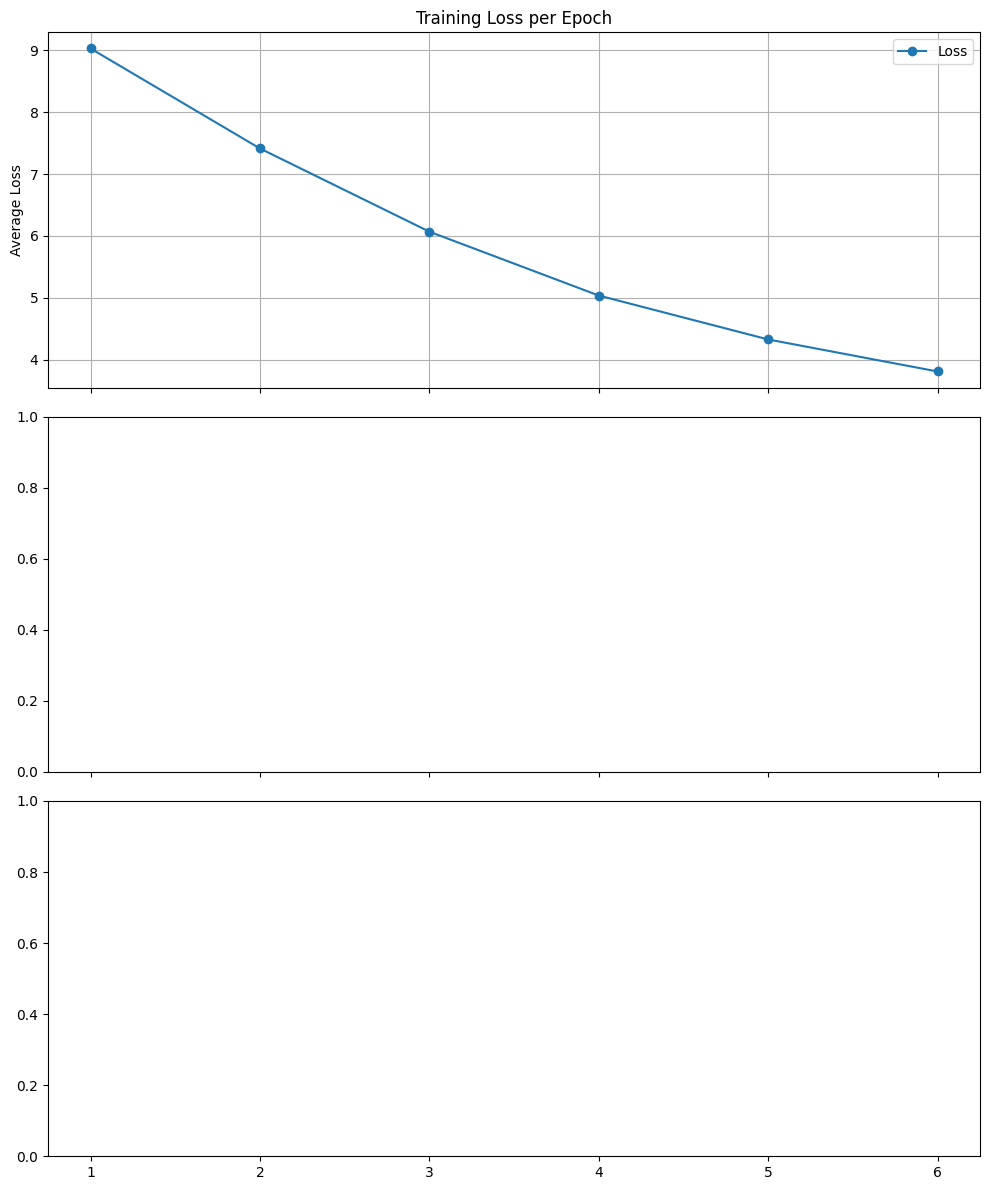

Running with p = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 200, 'q': 1, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 9.4024, Acc: 0.1167, Duration: 12.76s
    New best model saved with accuracy: 0.1167


Epoch: 002, Loss: 8.0542, Acc: 0.1583, Duration: 13.51s
    New best model saved with accuracy: 0.1583


Epoch: 003, Loss: 6.9003, Acc: 0.2472, Duration: 13.64s
    New best model saved with accuracy: 0.2472


Epoch: 004, Loss: 5.8970, Acc: 0.3333, Duration: 13.14s
    New best model saved with accuracy: 0.3333


Epoch: 005, Loss: 5.0581, Acc: 0.4500, Duration: 11.76s
    New best model saved with accuracy: 0.4500


Epoch: 006, Loss: 4.3778, Acc: 0.6083, Duration: 13.83s
    New best model saved with accuracy: 0.6083

Training finished.
Total elapsed time: 78.68 seconds
Best test accuracy: 0.6083
Best model state saved to './training_data/models/node2vec_'


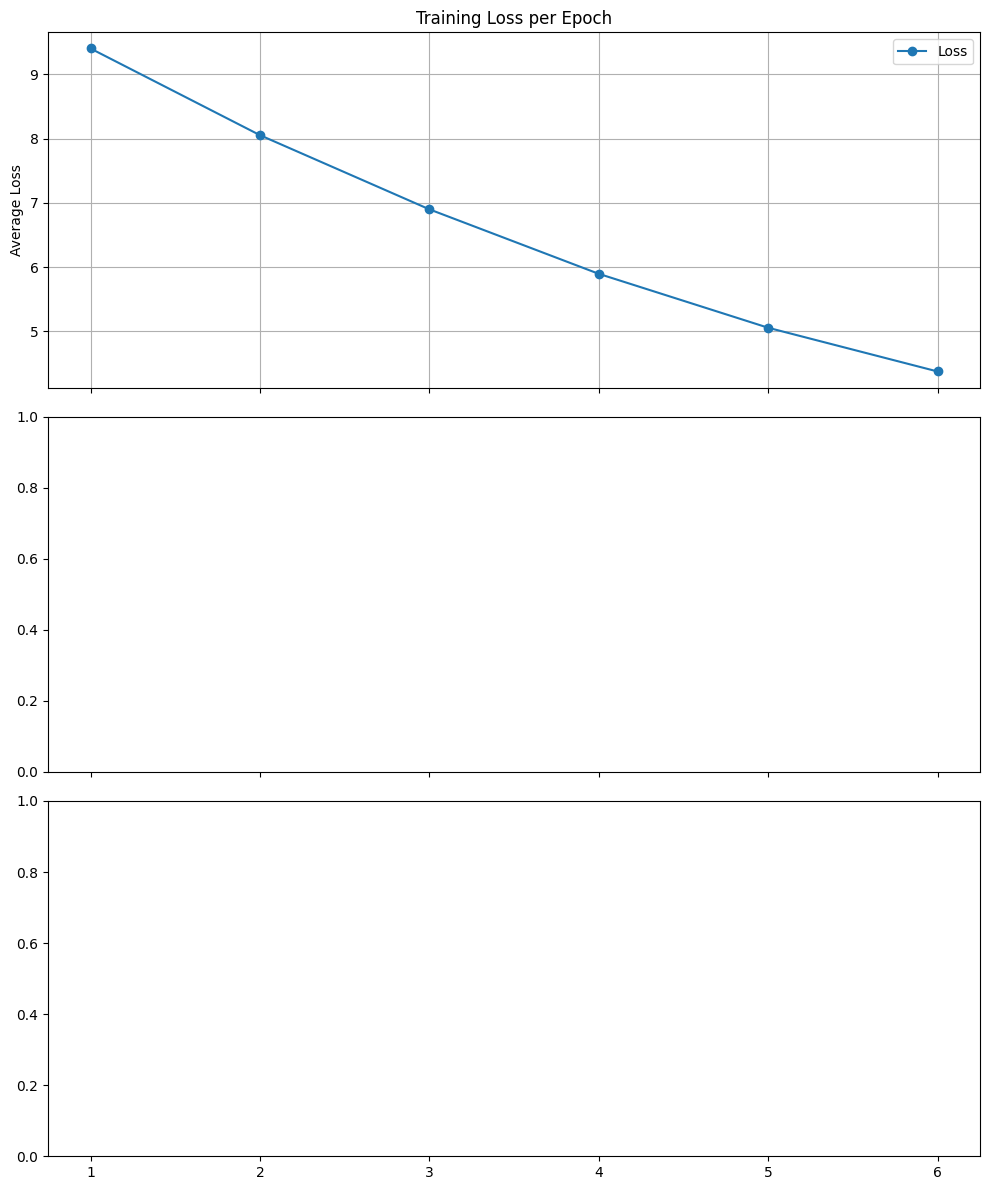

Running with q = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 1, 'q': 200, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 7.0403, Acc: 0.4130, Duration: 21.85s
    New best model saved with accuracy: 0.4130


Epoch: 002, Loss: 5.2792, Acc: 0.4179, Duration: 22.06s
    New best model saved with accuracy: 0.4179


Epoch: 003, Loss: 4.5357, Acc: 0.4260, Duration: 21.06s
    New best model saved with accuracy: 0.4260


Epoch: 004, Loss: 4.0835, Acc: 0.4293, Duration: 22.90s
    New best model saved with accuracy: 0.4293


Epoch: 005, Loss: 3.7258, Acc: 0.4276, Duration: 24.29s


Epoch: 006, Loss: 3.4015, Acc: 0.4374, Duration: 22.45s
    New best model saved with accuracy: 0.4374

Training finished.
Total elapsed time: 134.65 seconds
Best test accuracy: 0.4374
Best model state saved to './training_data/models/node2vec_'


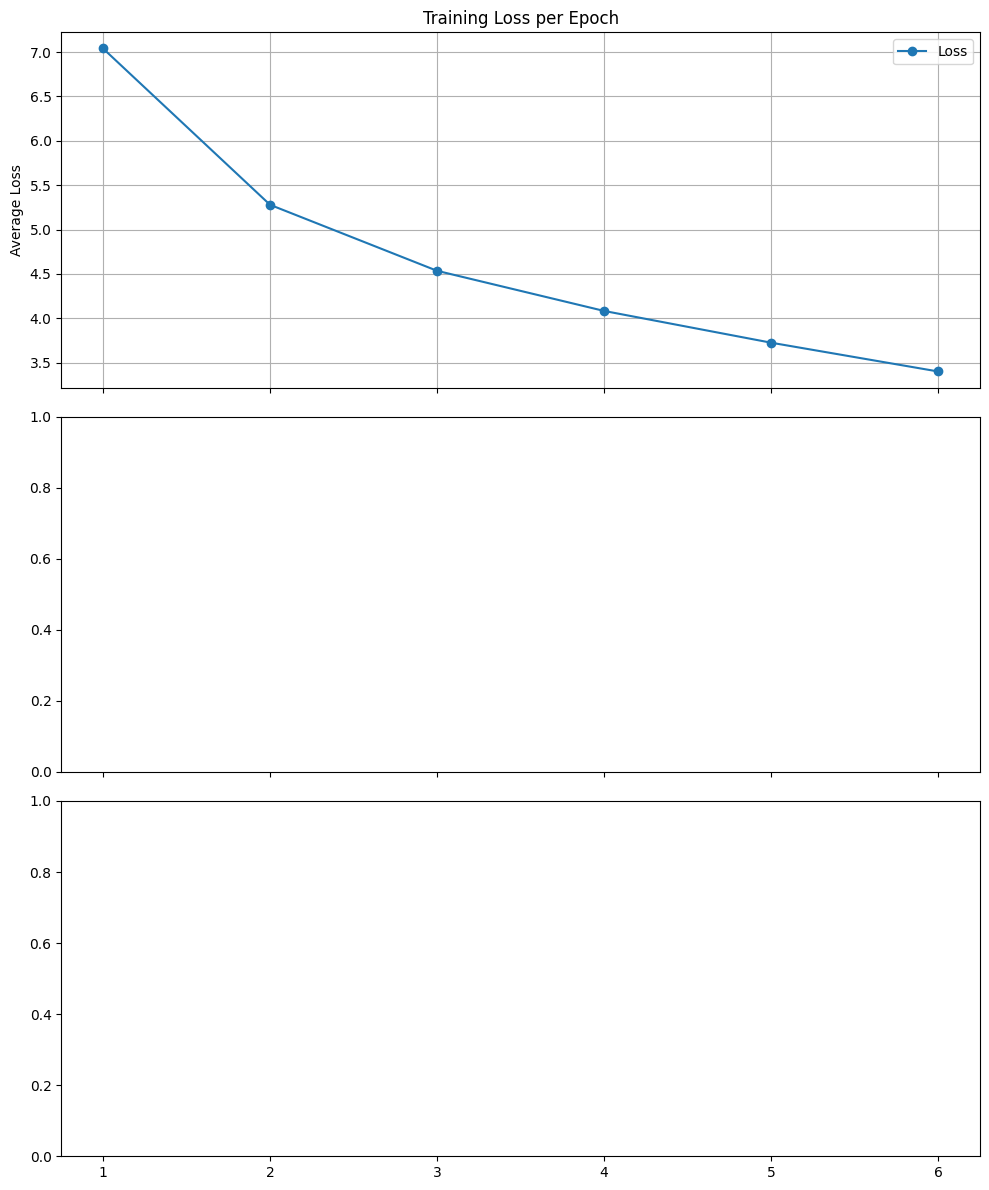

Running with p = {'embedding_dim': 128, 'walk_length': 20, 'context_size': 10, 'walks_per_node': 20, 'num_negative_samples': 1, 'p': 200, 'q': 1, 'sparse': True}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 6 epochs...


Epoch: 001, Loss: 7.6899, Acc: 0.4098, Duration: 38.08s
    New best model saved with accuracy: 0.4098


Epoch: 002, Loss: 5.6733, Acc: 0.4081, Duration: 42.83s


Epoch: 003, Loss: 4.8574, Acc: 0.4033, Duration: 37.49s


Epoch: 004, Loss: 4.3271, Acc: 0.3984, Duration: 31.34s


Epoch: 005, Loss: 3.8690, Acc: 0.4016, Duration: 28.32s


Epoch: 006, Loss: 3.4519, Acc: 0.4065, Duration: 33.70s

Training finished.
Total elapsed time: 211.78 seconds
Best test accuracy: 0.4098
Best model state saved to './training_data/models/node2vec_'


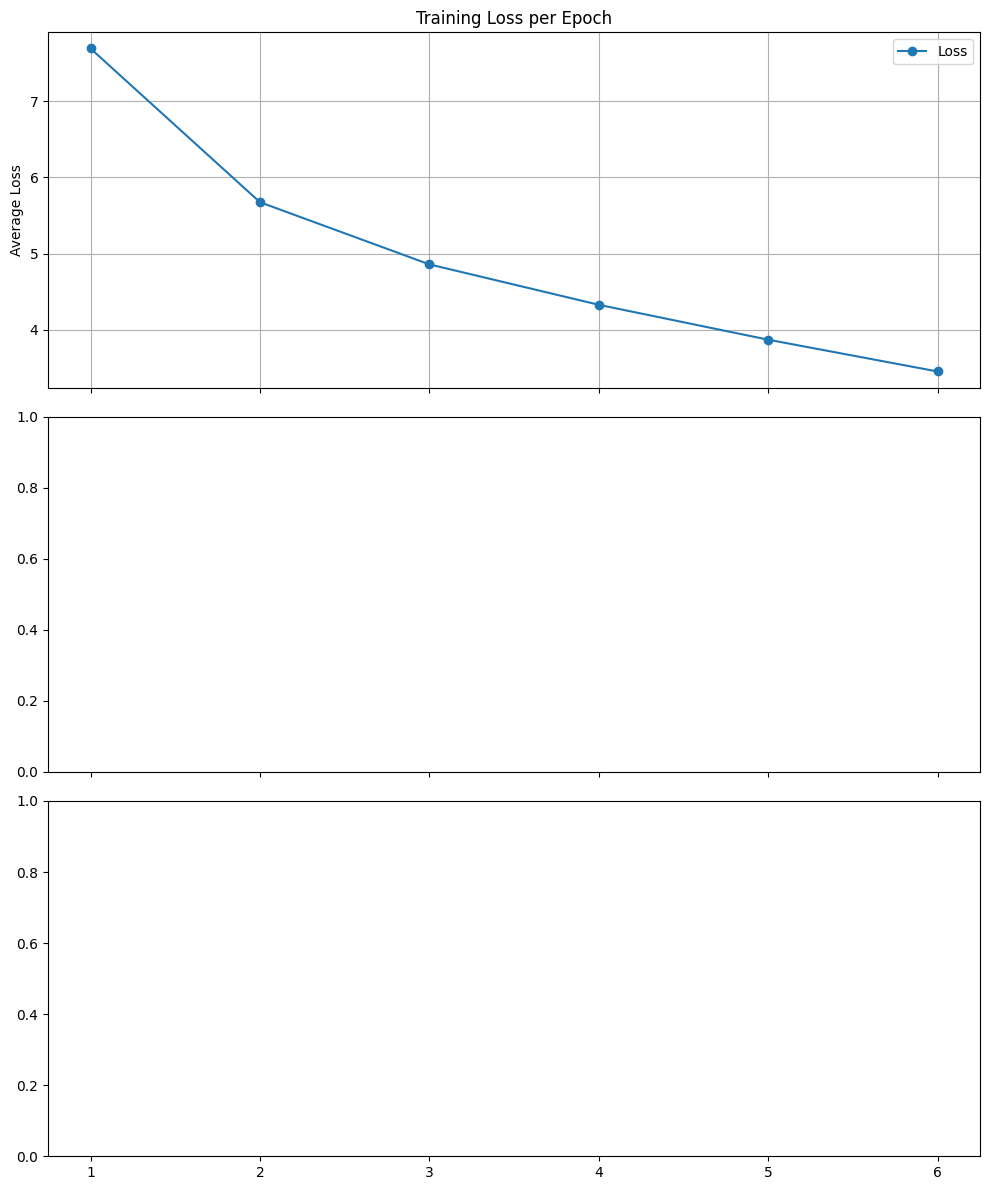

In [31]:
train_n2v.train_node2vecs(data_list)